In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!pip install geopandas
!pip install contextily
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 76.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.5 MB/s eta 0:00:00


In [ ]:
province = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/ProvCM01012022_WGS84.zip')
regioni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Reg01012022_WGS84.zip')
quartieri = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/POLISENO RICCARDO - ds964_nil_wm.zip')
parchi = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Parchi_regionali_e_nazionali_polygon.zip')

In [ ]:
province3857 = province.to_crs(3857)
regioni3857 = regioni.to_crs(3857)
quartieri3857 = quartieri.to_crs(3857)
parchi3857 = parchi.to_crs(3857)

1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

In [ ]:
comuni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Com01012022_WGS84.zip')
comuni3857 = comuni.to_crs(3857)

In [ ]:
comuni3857

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
0           1        1         1     201      201     1077    001077   
1           1        1         1     201      201     1079    001079   
2           1        1         1     201      201     1089    001089   
3           1        1         1     201      201     1006    001006   
4           1        1         1     201      201     1007    001007   
...       ...      ...       ...     ...      ...      ...       ...   
7899        2        5        26       0       26    26096    026096   
7900        2        4        22       0       22    22167    022167   
7901        1        3        15     215      215    15251    015251   
7902        2        4        22       0       22    22254    022254   
7903        1        3        97       0       97    97008    097008   

                     COMUNE COMUNE_A  CC_UTS    Shape_Area    Shape_Leng  \
0                Chiaverano     None       0  1.202212e+07  18164.236621   
1               Chiesanuova     None       0  4.118911e+06  10777.318814   
2                    Coazze     None       0  5.657268e+07  41591.122092   
3                    Almese     None       0  1.787564e+07  17058.439037   
4                   Alpette     None       0  5.626076e+06   9795.562269   
...                     ...      ...     ...           ...           ...   
7899       Pieve del Grappa     None       0  3.733847e+07  33907.733890   
7900  San Michele all'Adige     None       0  1.599623e+07  26368.864693   
7901      Vermezzo con Zelo     None       0  1.073678e+07  21854.020935   
7902        Ville di Fiemme     None       0  4.614933e+07  42004.727128   
7903                Bellano     None       0  2.202713e+07  24056.962561   

                                               geometry  
0     POLYGON ((879791.467 5704757.535, 879824.886 5...  
1     POLYGON ((851911.539 5689441.767, 852047.616 5...  
2     POLYGON ((810815.169 5634060.191, 810836.627 5...  
3     POLYGON ((827649.251 5642707.276, 827687.129 5...  
4     POLYGON ((843787.289 5687708.240, 843866.478 5...  
...                                                 ...  
7899  POLYGON ((1317670.177 5764578.394, 1317708.723...  
7900  POLYGON ((1243946.804 5816758.794, 1243996.351...  
7901  POLYGON ((1000027.053 5686703.670, 1000335.806...  
7902  POLYGON ((1279822.534 5838331.273, 1279871.642...  
7903  POLYGON ((1042273.519 5790072.242, 1042444.762...  

[7904 rows x 13 columns]

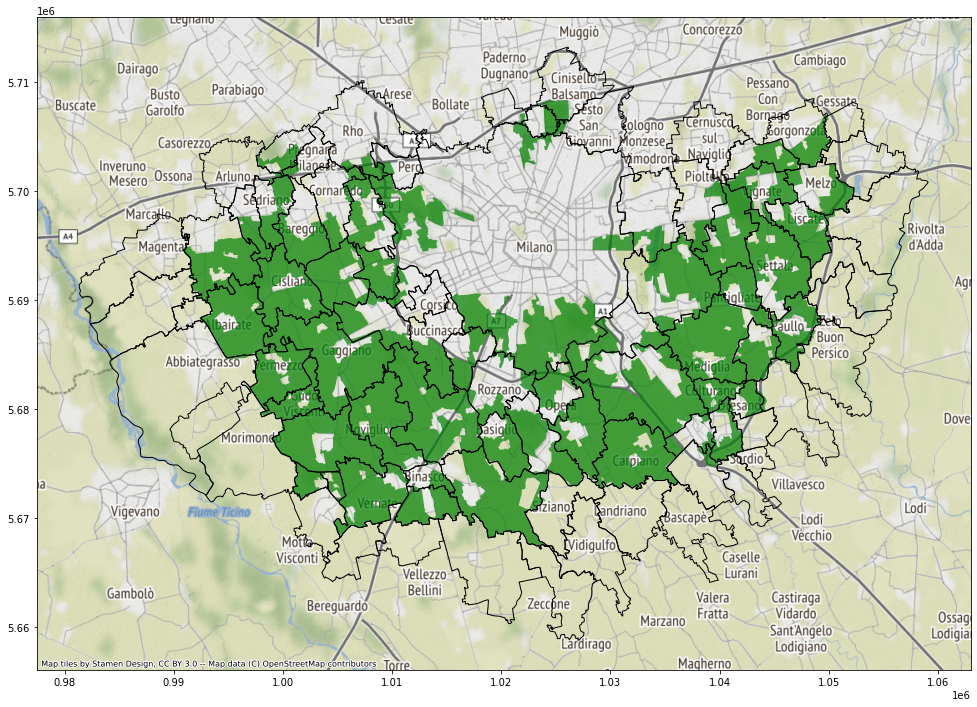

In [ ]:
milano = comuni3857[comuni3857.COMUNE	 == 'Milano']
parchi = parchi3857[parchi3857.intersects(milano.geometry.item())]
parchetti = parchi.unary_union
comunitoccati = comuni3857[comuni3857.intersects(parchetti)]
ax = parchi.plot(facecolor = 'g', alpha=0.7, figsize=(24,12))
comunitoccati.plot(facecolor = 'None', edgecolor = 'k', ax=ax)
contextily.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

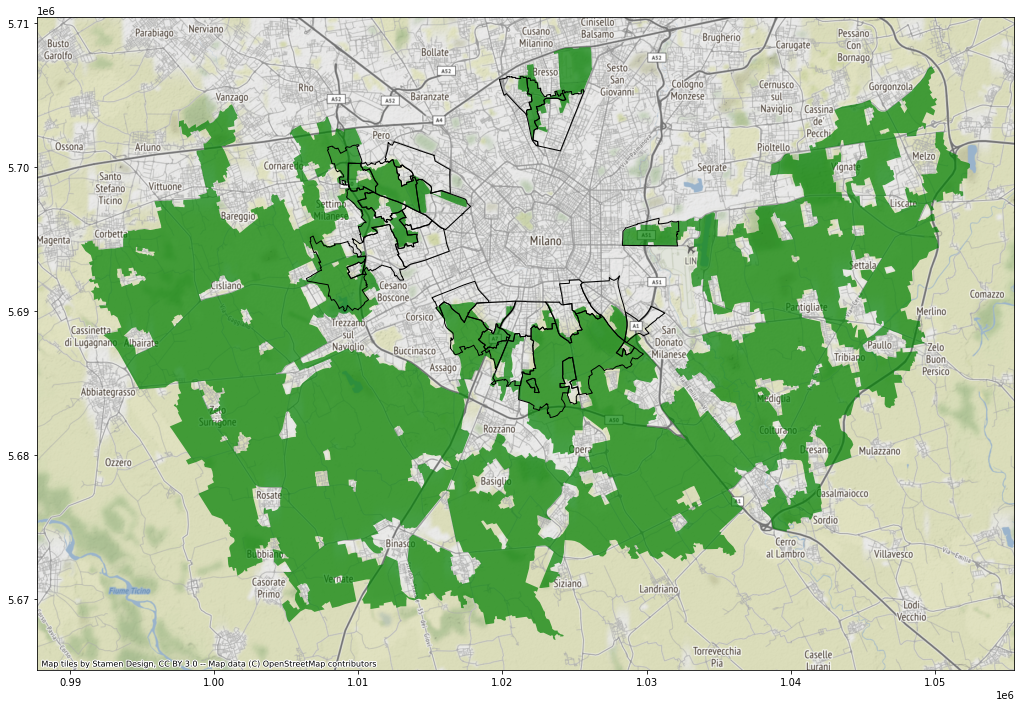

In [ ]:
quartieritoccati = quartieri3857[quartieri3857.intersects(parchetti)]
quartieritoccatiunary = quartieritoccati.unary_union
ax = parchi3857[parchi3857.intersects(quartieritoccatiunary)].plot(facecolor = 'g', alpha=0.7, figsize=(24,12))
quartieritoccati.plot(facecolor = 'None', edgecolor = 'k', ax=ax)
contextily.add_basemap(ax)

3.  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

Inserisci il numero del parco: Parco Sud Milano


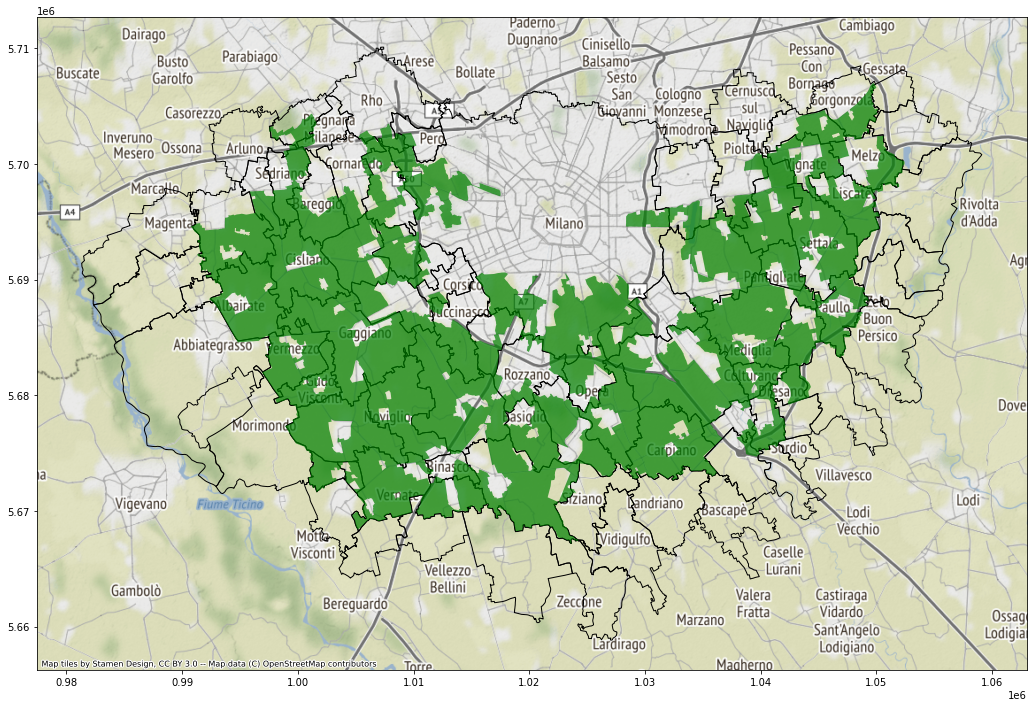

In [ ]:
inputparco = input('Inserisci il nome del parco: ')
if inputparco in parchi3857.NOME.tolist():
  if regioni3857[regioni3857.DEN_REG	== 'Lombardia'].contains(parchi3857[parchi3857.NOME == inputparco].unary_union).bool(): # ho usato unary_union perchè in alcuni casi i parchi avevo nomi uguali e risultavano più valori True
    ax = comuni3857[comuni3857.intersects(parchi3857[parchi3857.NOME == inputparco].unary_union)].plot(facecolor = 'None', edgecolor = 'k', figsize=(24,12))
    parchi3857[parchi3857.NOME == inputparco].plot(facecolor = 'g', alpha=0.7, ax=ax)
    contextily.add_basemap(ax)
  else:
    print(inputparco, 'non si trova in Lombardia.')
elif inputparco not in parchi3857.NOME.tolist():
  print('Nessun parco si chiama', inputparco)
else:
  print('Non funziona qualcosa qui.')

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

Inserisci il numero del parco: Parco Nord Milano


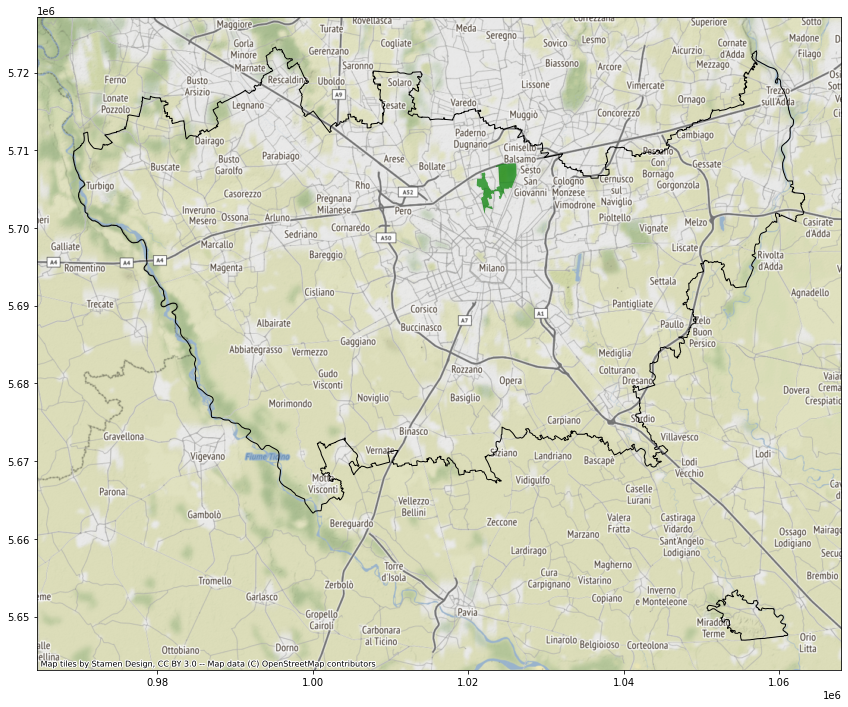

In [ ]:
inputparco = input('Inserisci il nome del parco: ')
if inputparco in parchi3857.NOME.tolist():
  if regioni3857[regioni3857.DEN_REG	== 'Lombardia'].contains(parchi3857[parchi3857.NOME == inputparco].unary_union).bool():
    ax = province3857[province3857.intersects(parchi3857[parchi3857.NOME == inputparco].unary_union)].plot(facecolor = 'None', edgecolor = 'k', figsize=(24,12))
    parchi3857[parchi3857.NOME == inputparco].plot(facecolor = 'g', alpha=0.7, ax=ax)
    contextily.add_basemap(ax)
  else:
    print(inputparco, 'non si trova in Lombardia.')
elif inputparco not in parchi3857.NOME.tolist():
  print('Nessun parco si chiama', inputparco)
else:
  print('Non funziona qualcosa qui.')

5. dato un comune, avere i parchi che ospita (elenco e mappa)

Inserisci il numero del comune: Bresso
    FID               NOME  COD_AREA CLASSIF                        DCLASSIF  \
20   21  Parco Nord Milano        22       5  Parco di cintura metropolitana   

    TIPO            DTIPO  TIPO_AREA      DTIPO_AREA              COD_NOME  \
20     2  Parco Regionale          1  Area Regionale  22:Parco Nord Milano   

                                             geometry  
20  POLYGON ((1025401.434 5705192.594, 1025259.894...  


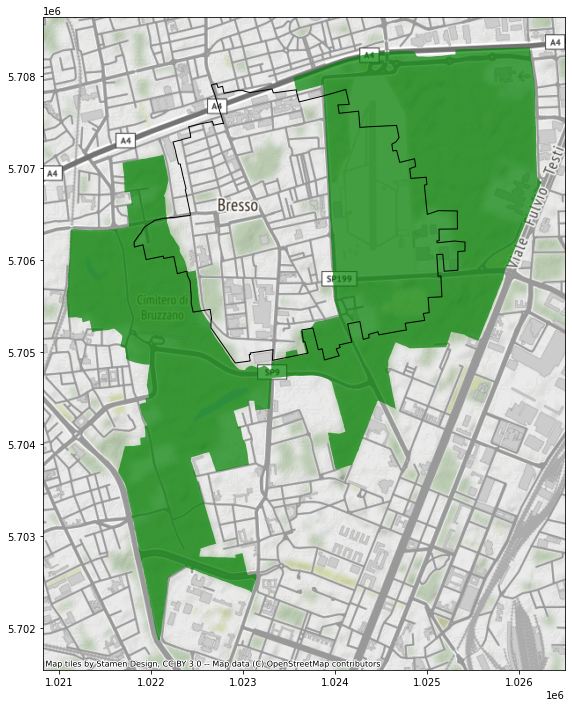

In [ ]:
inputcomune = input('Inserisci il nome del comune: ')
if inputcomune in comuni3857.COMUNE.tolist():
  if regioni3857[regioni3857.DEN_REG	== 'Lombardia'].contains(comuni3857[comuni3857.COMUNE == inputcomune].geometry.item()).bool():
    print(parchi3857[parchi3857.intersects(comuni3857[comuni3857.COMUNE == inputcomune].geometry.item())])
    ax = parchi3857[parchi3857.intersects(comuni3857[comuni3857.COMUNE == inputcomune].geometry.item())].plot(facecolor = 'g', alpha=0.7,  figsize=(24,12))
    comuni3857[comuni3857.COMUNE == inputcomune].plot(facecolor = 'None',edgecolor = 'k', ax=ax)
    contextily.add_basemap(ax)
  else:
    print(inputcomune, 'non si trova in Lombardia.')
elif inputparco not in comuni3857.COMUNE.tolist():
  print('Nessun comune si chiama', inputcomune)
else:
  print('Non funziona qualcosa qui.')

6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)


Inserisci il nome della provincia: Como
    FID                                             NOME  COD_AREA CLASSIF  \
10   11                        Parco Spina Verde di Como        24       2   
15   12                           Parco Valle del Lambro        10      45   
16   13                        Parco Spina Verde di Como        24       2   
17   14  Parco della Pineta di Appiano Gentile e Tradate         8       2   

                                     DCLASSIF  TIPO            DTIPO  \
10                            Parco forestale     2  Parco Regionale   
15  Parco fluviale e di cintura metropolitana     2  Parco Regionale   
16                            Parco forestale     2  Parco Regionale   
17                            Parco forestale     2  Parco Regionale   

    TIPO_AREA      DTIPO_AREA  \
10          1  Area Regionale   
15          1  Area Regionale   
16          1  Area Regionale   
17          1  Area Regionale   

                                          

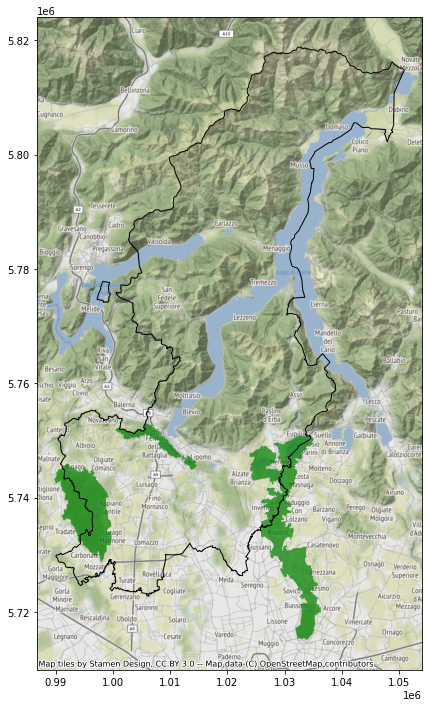

In [ ]:
inputprovincia = input('Inserisci il nome della provincia: ')
if inputprovincia in province3857.DEN_PROV.tolist():
  if regioni3857[regioni3857.DEN_REG	== 'Lombardia'].contains(province3857[province3857.DEN_PROV == inputprovincia].geometry.item()).bool():
    print(parchi3857[parchi3857.intersects(province3857[province3857.DEN_PROV == inputprovincia].geometry.item())])
    ax = parchi3857[parchi3857.intersects(province3857[province3857.DEN_PROV == inputprovincia].geometry.item())].plot(facecolor = 'g', alpha=0.7,  figsize=(24,12))
    province3857[province3857.DEN_PROV == inputprovincia].plot(facecolor = 'None',edgecolor = 'k', ax=ax)
    contextily.add_basemap(ax)
  else:
    print(inputprovincia, 'non si trova in Lombardia.')
elif inputparco not in province3857.DEN_PROV.tolist():
  print('Nessun comune si chiama', inputprovincia)
else:
  print('Non funziona qualcosa qui.')